### Problem statement
Given data set with "R&D Spend","Administration", "Marketing Spend"	"State"	"Profit" for 50 startups. We need to fit a model to predict the profit given other parameters for a new start up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    data = pd.read_csv("50_Startups.csv")
    print(data)
    X = data.iloc[:,:-1].values
    Y = data.iloc[:,-1].values
    return X,Y
    

In [8]:
X,Y = load_data()
print(X)
print(Y)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

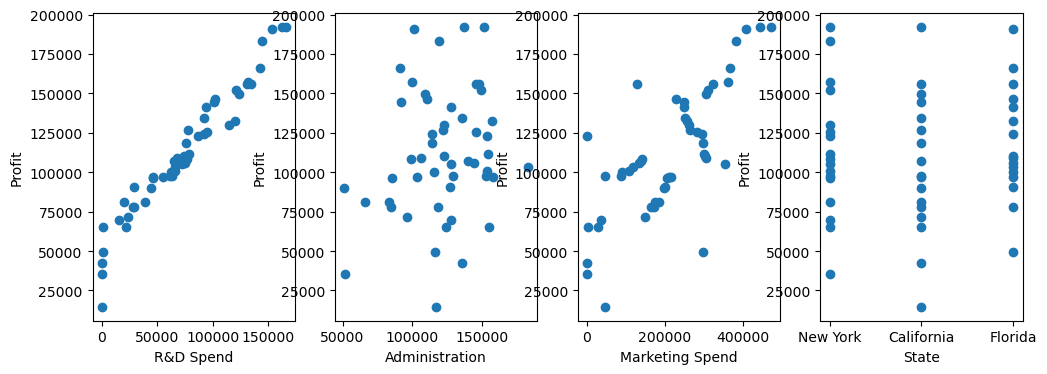

In [19]:
features = [ "R&D Spend","Administration","Marketing Spend","State"]
## Plot the profit vs columns
fig,ax = plt.subplots(1,4,figsize=(12,4))
for i in range(len(ax)):
    ax[i].scatter(X[:,i],Y)
    ax[i].set_xlabel(features[i])
    ax[i].set_ylabel("Profit")

In [10]:
## 3rd column is having categorical data. Let us encode it using OneHot encoder. Let us the column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

col_transformer = ColumnTransformer(transformers=[('encode',OneHotEncoder(),[3])],remainder='passthrough')
X_transformed = np.array(col_transformer.fit_transform(X))
print(X_transformed)



[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_transformed,Y,test_size=0.33,random_state=0)
print(len(x_train), len(y_test))

33 17


In [24]:
#fit using linear regression 
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [25]:
print(f"coef = {linear_reg.coef_} intercept = {linear_reg.intercept_}")

coef = [-1.86280085e+03  4.06383296e+03 -2.20103211e+03  8.28371991e-01
  5.03972419e-02  2.21861926e-02] intercept = 41011.48935223132


In [27]:
## y_train_pred for x_train
y_train_pred = linear_reg.predict(x_train)

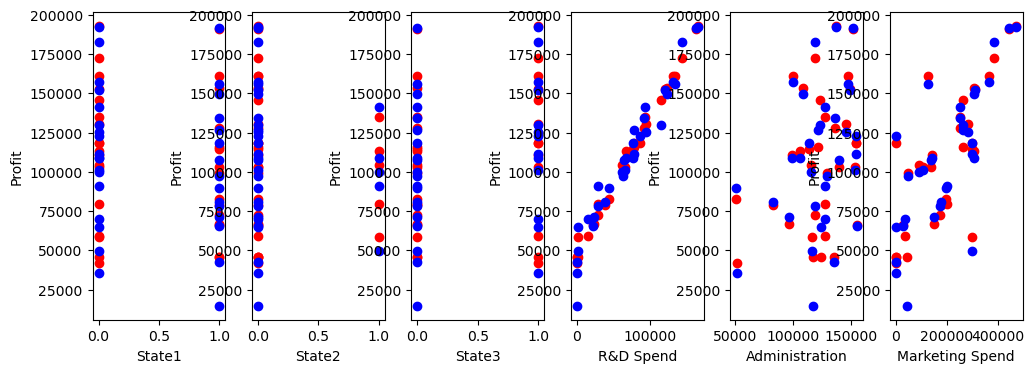

In [32]:
features = [ "State1", "State2" , "State3","R&D Spend","Administration","Marketing Spend"]
## Plot the profit vs columns
fig,ax = plt.subplots(1,6,figsize=(12,4))
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train_pred,color="red")
    ax[i].scatter(x_train[:,i],y_train,color="blue")
    ax[i].set_xlabel(features[i])
    ax[i].set_ylabel("Profit")

In [33]:
## y_train_pred for x_train
y_test_pred = linear_reg.predict(x_test)
print(y_test_pred, y_test)

[111616.64259452 132709.39466315 140155.11033793  76099.20398184
 186329.94240372 112822.19807257  63002.00394805  99107.10428091
 119287.75473384 175522.83864739 101000.69861501  85772.99293235
 117713.76481525  90230.88085202 133375.04389452 167530.54765829
 158013.54602063] [103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94  96778.92  96479.51 105733.54  96712.8
 124266.9  155752.6  132602.65]


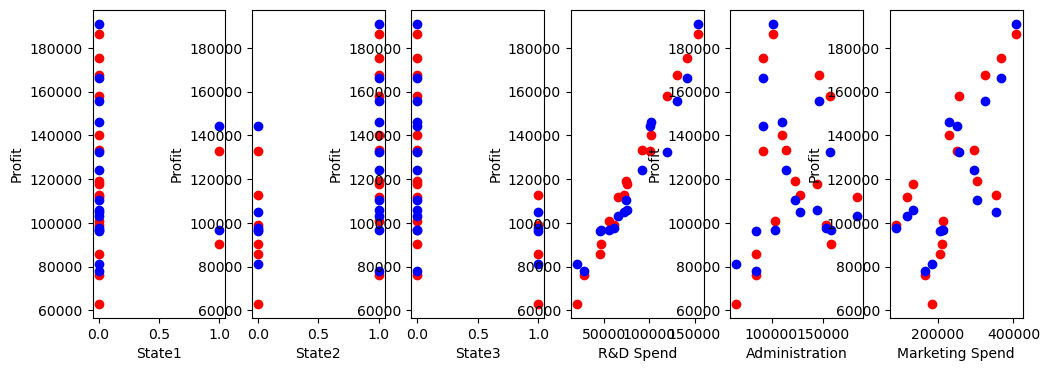

In [35]:
features = [ "State1", "State2" , "State3","R&D Spend","Administration","Marketing Spend"]
## Plot the profit vs columns
fig,ax = plt.subplots(1,6,figsize=(12,4))
for i in range(len(ax)):
    ax[i].scatter(x_test[:,i],y_test_pred,color="red")
    ax[i].scatter(x_test[:,i],y_test,color="blue")
    ax[i].set_xlabel(features[i])
    ax[i].set_ylabel("Profit")